In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:

 
def K_gauss(x):
    return np.exp(-x**2/2) / np.sqrt(2*np.pi)
 
def K_uniform(x):
    return 0.5*(np.abs(x) < 1)
 
def K_epanechnikov(x):
    return 3/4*(1-x**2)*(np.abs(x) < 1)
 

def K_gauss(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-0.5*x**2)
 
def kernel_density(t, x, h):
    """Return kernel density at t estimated for points x with width h
    Input: t (np.array, shape (k, )) for k points or float for 1 point
    x (np.array, shape (n, )) for n points
    h double"""
    try:
        N = len(t)
    except:   # t is a scalar value if it has no length
        t = np.array([t])
        N = 1
    y = np.zeros(N)
    for i in range(N):
        y[i] = np.mean(K_gauss((t[i] - x)/ h)) / h
    return y



In [95]:
def displacement(FPn):
    x=24.324744
    y=12.399260
    z=11.812478
    dfFP=pd.DataFrame()
    dfDFT=pd.DataFrame()
    dfFP=pd.read_csv('data.FPs{}'.format(FPn),skiprows=14,sep=' ',nrows=320,header=None)
    dfDFT=pd.read_csv('data.DFT{}'.format(FPn),skiprows=14,sep=' ',nrows=320,header=None)
    dis=dfDFT-dfFP
    dis = dis.drop(columns=[0,1])
    dis = dis.rename(columns={2:'x',3:'y',4:'z'})
    for i in range(320):
        if abs(dis.x[i])+3>x:
            if dis.x[i]>0:
                dis.x[i]=dis.x[i]-x
            else:
                dis.x[i]=dis.x[i]+x
        if abs(dis.y[i])+3>y:
            if dis.y[i]>0:
                dis.y[i]=dis.y[i]-y
            else:
                dis.y[i]=dis.y[i]+y
        if abs(dis.z[i])+3>z:
            if dis.z[i]>0:
                dis.z[i]=dis.z[i]-z
            else :
                dis.z[i]=dis.z[i]+z
    dis['dis']=np.sqrt(dis.x**2+dis.y**2+dis.z**2)
    #print(dis['dis'].describe())
    d=dis.dis
    t = np.linspace(0, max(d), 100) 
    bin_edges = np.linspace(min(d), max(d),30)
    #hist1, bin_edge, patches=plt.hist(d, bins=bin_edges,alpha=0.6,histtype='bar',density=True)
    #hist2, bin_edge = np.histogram(d, bins=bin_edges, density=True)
    #ex=hist1[0]/hist2[0]
    return t, kernel_density(t, d, 0.1),dis

In [34]:
def displacement_A(FPn,FPtype):
    x=24.324744
    y=12.399260
    z=11.812478
    dfFP=pd.DataFrame()
    dfDFT=pd.DataFrame()
    dfFP=pd.read_csv('data.FPs{}'.format(FPn),skiprows=14,sep=' ',nrows=320,header=None)
    dfDFT=pd.read_csv('data.DFT{}'.format(FPn),skiprows=14,sep=' ',nrows=320,header=None)
    dis=dfDFT-dfFP
    dis = dis.drop(columns=[0,1])
    dis = dis.rename(columns={2:'x',3:'y',4:'z'})
    for i in range(320):
        if abs(dis.x[i])+3>x:
            if dis.x[i]>0:
                dis.x[i]=dis.x[i]-x
            else:
                dis.x[i]=dis.x[i]+x
        if abs(dis.y[i])+3>y:
            if dis.y[i]>0:
                dis.y[i]=dis.y[i]-y
            else:
                dis.y[i]=dis.y[i]+y
        if abs(dis.z[i])+3>z:
            if dis.z[i]>0:
                dis.z[i]=dis.z[i]-z
            else :
                dis.z[i]=dis.z[i]+z
    dis['dis']=np.sqrt(dis.x**2+dis.y**2+dis.z**2)
    #print(dis['dis'].describe())
    d=dis.dis
    t = np.linspace(0, max(d), 100) 
    bin_edges = np.linspace(min(d), max(d),30)
    hist1, bin_edge, patches=plt.hist(d, bins=bin_edges,alpha=0.6,histtype='bar',density=True)
    hist2, bin_edge = np.histogram(d, bins=bin_edges, density=True)
    ex=hist1[0]/hist2[0]

    plt.plot(t, kernel_density(t, d, 0.1)*ex, label='{}'.format(FPn) + ' ' + FPtype,linewidth=2)
    #sns.kdeplot(dis.dis, label='{}'.format(FPn) + ' ' + FPtype)
    plt.xlabel('Displacement distance, ($\AA$)',fontsize=20)
    plt.ylabel('Atom numbers',fontsize=20)
    plt.legend(fontsize=20,frameon=False)
    plt.rcParams["font.family"] = "arial"
    plt.grid(False)
    # Set the desired x-axis limits
    plt.xlim(0, 6)
    #plt.xticks([ 0.5, 1])

    #plt.ylim(0, 3.5)# Replace x_min and x_max with your desired range
    plt.rcParams["axes.linewidth"] = 2 
    plt.rcParams["axes.edgecolor"] = 'black'
    plt.rcParams["figure.figsize"] = (4,6) 
    plt.xticks(fontsize=20) 
    plt.yticks(fontsize=20) 
    return dis


20     index         x         y         z       dis
65     65  1.855195  3.078412  0.190242  3.599245
20 ParticleIdentifier==66||
20     index         x         y        z       dis
86     86  2.523823  1.355414  0.46051  2.901534
20 ParticleIdentifier==87||
80      index         x         y         z       dis
294    294 -2.474772 -2.659736 -0.364245  3.651215
80 ParticleIdentifier==295||
80      index         x         y         z       dis
230    230  1.628750  1.665292 -1.129247  2.588672
258    258 -0.075872  0.036445 -2.559467  2.560851
80 ParticleIdentifier==231||ParticleIdentifier==259||


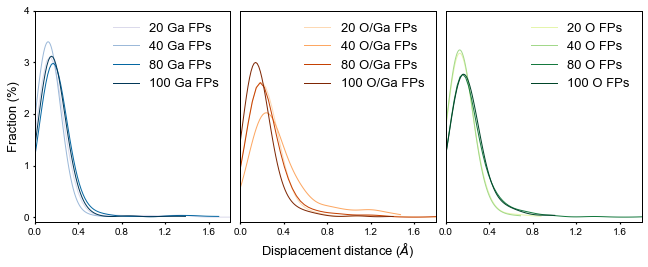

In [123]:
# Modify a global rcParam
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams["font.family"] = "arial"
fig, axs = plt.subplots(1, 3,figsize=(8.6,6/2),sharey=True)
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99, wspace=0.05, hspace=0.1)
#path='/Users/ruhe/Desktop/ga2o3/FP/tabGap/DFT/Ga'
path='/home/heruhe/Desktop/Ga2o3/Frenkelpair/FP_beta/DFT/320atoms_MD_DFT/Ga'
os.chdir(path)
cmap = plt.get_cmap('PuBu')
for FPn in [20,40,80,100]:
    c= cmap(FPn/100)
    t,d,dis=displacement(FPn)
    dis =  dis.reset_index()
    if len(dis[dis.dis>2])>0:
        print(FPn,dis[dis.dis>2])
        expre=''
        for i in dis[dis.dis>2].index:
            expre=expre+'ParticleIdentifier=='+ str(i+1) + '||' 
        print(FPn, expre)
    axs[0].plot(t, d, label='{}'.format(FPn) + ' ' + 'Ga FPs',linewidth=1, color=c)
axs[0].set_xlim(0, 1.8)
axs[0].set_ylim(-0.1, 4)

axs[0].set_ylabel('Fraction (%)',fontsize=13)
axs[0].legend(fontsize=13,frameon=False)

axs[0].grid(False)
    # Set the desired x-axis limits

axs[0].set_xticks([ 0,0.4 ,0.8 ,1.2, 1.6],fontsize=15)
axs[0].set_yticks([ 0,1.0 ,2.0 ,3.0, 4.0],fontsize=15)

axs[0].tick_params(axis='x', width=1.2,length=2)
axs[0].tick_params(axis='y', width=1.2,length=2)
path='/home/heruhe/Desktop/Ga2o3/Frenkelpair/FP_beta/DFT/320atoms_MD_DFT/mix'
os.chdir(path)
cmap = plt.get_cmap('Oranges')
for FPn in [20,40,80,100]:
    c= cmap((FPn)/100)
    t,d,dis=displacement(FPn)
    dis =  dis.reset_index()
    if len(dis[dis.dis>2])>0:
        print(FPn,dis[dis.dis>2])
        expre=''
        for i in dis[dis.dis>2].index:
            expre=expre+'ParticleIdentifier=='+ str(i+1) + '||' 
        print(FPn, expre)
    axs[1].plot(t, d, label='{}'.format(FPn) + ' ' + 'O/Ga FPs',linewidth=1, color=c)
axs[1].set_xlim(0, 1.8)
axs[1].set_ylim(-0.1, 4)
axs[1].legend(fontsize=13,frameon=False)

axs[1].grid(False)
    # Set the desired x-axis limits

axs[1].set_xticks([ 0,0.4 ,0.8 ,1.2, 1.6],fontsize=15)
axs[1].tick_params(axis='x', width=1.2,length=2)
axs[1].tick_params(axis='y', width=0,length=0)
axs[1].set_xlabel('Displacement distance ($\AA$)',fontsize=13)
path='/home/heruhe/Desktop/Ga2o3/Frenkelpair/FP_beta/DFT/320atoms_MD_DFT/O'
os.chdir(path)
cmap = plt.get_cmap('YlGn')
for FPn in [20,40,80,100]:
    c= cmap((FPn)/100)
    t,d,dis=displacement(FPn)
    dis =  dis.reset_index()
    if len(dis[dis.dis>2])>0:
        print(FPn,dis[dis.dis>2])
        expre=''
        for i in dis[dis.dis>2].index:
            expre=expre+'ParticleIdentifier=='+ str(i+1) + '||' 
        print(FPn, expre)
    axs[2].plot(t, d, label='{}'.format(FPn) + ' ' + 'O FPs',linewidth=1, color=c)
axs[2].set_xlim(0, 1.8)
axs[2].set_ylim(-0.1, 4)
axs[2].legend(fontsize=13,frameon=False)

axs[2].grid(False)
    # Set the desired x-axis limits

axs[2].set_xticks([ 0,0.4 ,0.8 ,1.2, 1.6],fontsize=15)
axs[2].tick_params(axis='x', width=1.2,length=2)
axs[2].tick_params(axis='y', width=0,length=0)




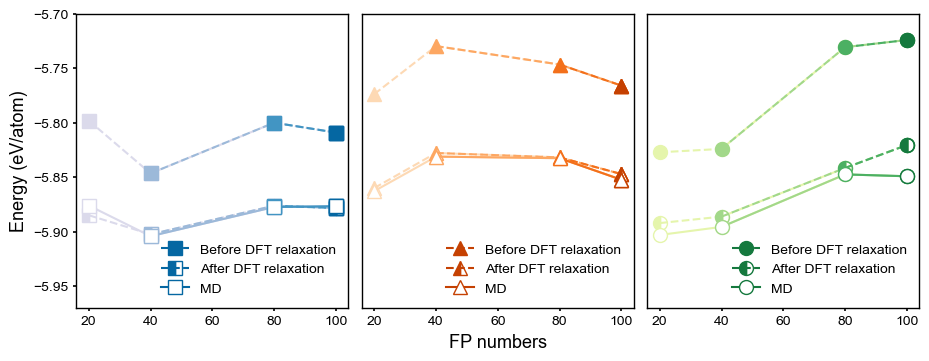

In [97]:
# Modify a global rcParam
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams["font.family"] = "arial"
fig, axs = plt.subplots(1, 3,figsize=(8.6,6/2),sharey=True)
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99, wspace=0.05, hspace=0.1)
before_dft_Ga_pe=np.array([-1855.4,-1870.9,-1856.0,-1858.9])/320
after_dft_Ga_pe=np.array([-1883.2,-1888.8,-1880.4,-1881.1])/320
md_relax=np.array([-5.8761,-5.9042, -5.8774,-5.87674])
n=[20,40,80,100]
# Define the colormap
cmap = plt.get_cmap('PuBu')

# Determine the number of colors you want
num_colors = 5

# Create an array of colors using the colormap
colors = [cmap((i+1) / num_colors) for i in range(num_colors)]

# Plot the line segment by segment with different colors
for i in range(num_colors - 1):
    axs[0].plot(n[i:i+3], before_dft_Ga_pe[i:i+3],marker="s",markersize=10,linestyle='--',color=colors[i])
    axs[0].plot(n[i:i+3], after_dft_Ga_pe[i:i+3],marker="s", color=colors[i], markersize=10,linestyle='--',fillstyle='left')
    axs[0].plot(n[i:i+3], md_relax[i:i+3],color=colors[i],marker="s",markersize=10,markerfacecolor='white')
axs[0].plot(n[i:i+3], before_dft_Ga_pe[i:i+3],marker="s",markersize=10, color=colors[i],linestyle='--',label='Before DFT relaxation')
axs[0].plot(n[i:i+3], after_dft_Ga_pe[i:i+3],marker="s", markersize=10,color=colors[i],linestyle='--', fillstyle='left',label='After DFT relaxation')
axs[0].plot(n[i:i+3], md_relax[i:i+3],color=colors[i],marker="s",markersize=10,markerfacecolor='white',label='MD')
axs[0].set_ylabel('Energy (eV/atom)',fontsize=13)
axs[0].tick_params(axis='x', width=1.2,length=2)
axs[0].tick_params(axis='y', width=1.2,length=2)
axs[0].legend(loc='lower right',frameon=False)
before_dft_mix_pe=np.array([-1847.6,-1833.5,-1838.9,-1845.1])/320
after_dft_mix_pe=np.array([-1875.2,-1864.9,-1866.2,-1871.1])/320
#before_md_relax=np.array([-5.8387,-5.80797,-5.8105,-5.8304])
md_relax=np.array([-5.8628,-5.831157,-5.8326,-5.8524])
# Define the colormap
cmap = plt.get_cmap('Oranges')

# Determine the number of colors you want
num_colors = 5

# Create an array of colors using the colormap
colors = [cmap((i+1) / num_colors) for i in range(num_colors)]

# Plot the line segment by segment with different colors
for i in range(num_colors - 1):
    axs[1].plot(n[i:i+3], before_dft_mix_pe[i:i+3],marker="^", color=colors[i],linestyle='--',markersize=10)
    axs[1].plot(n[i:i+3], after_dft_mix_pe[i:i+3],marker="^", color=colors[i], markersize=10,linestyle='--',fillstyle='left')
    axs[1].plot(n[i:i+3], md_relax[i:i+3],color=colors[i],marker="^",markerfacecolor='white', markersize=10)
axs[1].plot(n[i:i+3], before_dft_mix_pe[i:i+3],marker="^", color=colors[i],markersize=10,linestyle='--',label='Before DFT relaxation')
axs[1].plot(n[i:i+3], after_dft_mix_pe[i:i+3],marker="^", color=colors[i],markersize=10,linestyle='--',fillstyle='left',label='After DFT relaxation')
axs[1].plot(n[i:i+3], md_relax[i:i+3],color=colors[i],marker="^",markersize=10,markerfacecolor='white',label='MD')
axs[1].set_xlabel('FP numbers',fontsize=13)
axs[1].tick_params(axis='x', width=1.2,length=2)
axs[1].tick_params(axis='y', width=0,length=0)
axs[1].legend(loc='lower right',frameon=False)
before_dft_o_pe=np.array([-1864.7,-1863.7,-1833.8,-1831.7])/320
after_dft_o_pe=np.array([-1885.5,-1883.6,-1869.3,-1862.569])/320
#before_md_relax=np.array([-5.880,-5.872,-5.8236,-5.825])
md_relax=np.array([-5.9031,-5.8957,-5.8475,-5.8492])
# Define the colormap
cmap = plt.get_cmap('YlGn')

# Determine the number of colors you want
num_colors = 5

# Create an array of colors using the colormap
colors = [cmap((i+1) / num_colors) for i in range(num_colors)]

# Plot the line segment by segment with different colors
for i in range(num_colors - 1):
    axs[2].plot(n[i:i+3], before_dft_o_pe[i:i+3],marker="o", color=colors[i],linestyle='--',markersize=10)
    axs[2].plot(n[i:i+3], after_dft_o_pe[i:i+3],marker="o", color=colors[i],linestyle='--',markersize=10,fillstyle='left')
    axs[2].plot(n[i:i+3], md_relax[i:i+3],color=colors[i],marker="o",markerfacecolor='white',markersize=10)
axs[2].plot(n[i:i+3], before_dft_o_pe[i:i+3],marker="o", color=colors[i],linestyle='--',markersize=10,label='Before DFT relaxation')
axs[2].plot(n[i:i+3], after_dft_o_pe[i:i+3],marker="o", color=colors[i],linestyle='--',markersize=10,fillstyle='left',label='After DFT relaxation')
axs[2].plot(n[i:i+3], md_relax[i:i+3],color=colors[i],marker="o",markerfacecolor='white',markersize=10,label='MD')
axs[2].set_ylim(-5.97, -5.7)
axs[2].tick_params(axis='x', width=1.2,length=2)
axs[2].tick_params(axis='y', width=0,length=0)
axs[2].legend(loc='lower right',frameon=False)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

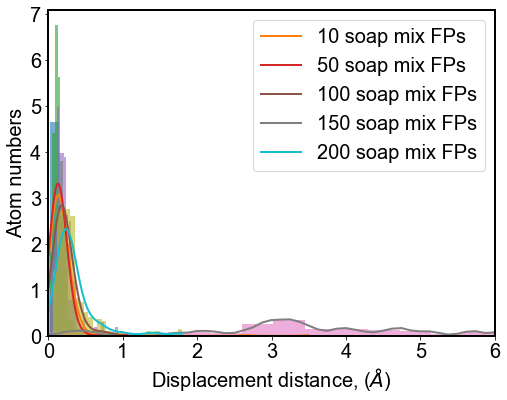

In [234]:
path='/home/heruhe/Desktop/Ga2o3/Frenkelpair/FP_beta/DFT/two_potential_contrast/soap/mix'
os.chdir(path)
for FPn in [10,50,100,150,200]:
    dis=displacement_A(FPn,'soap mix FPs')
plt.legend(fontsize=20)
plt.rcParams["font.family"] = "arial"
plt.grid(False)
# Set the desired x-axis limits
#plt.xlim(0, 3)
#plt.ylim(0, 10)# Replace x_min and x_max with your desired range
plt.rcParams["axes.linewidth"] = 2 
plt.rcParams["axes.edgecolor"] = 'black'
plt.rcParams["figure.figsize"] = (8,6) 
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 

-5.7946875 -5.904999999999999


(array([-5.95, -5.9 , -5.85, -5.8 , -5.75, -5.7 , -5.65, -5.6 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

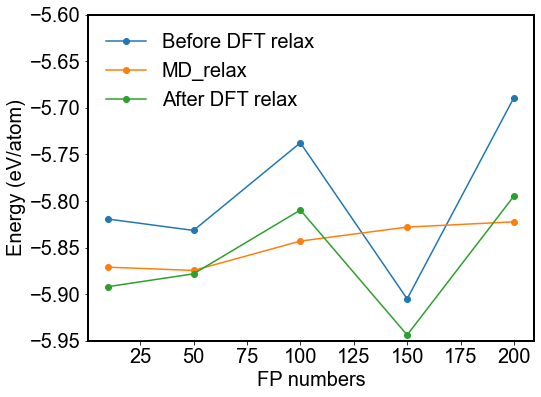

In [250]:
#soapGap
before_dft_mix_pe=np.array([-1862.2,-1866.1,-1836.0,-1889.6,-1820.5])/320
after_dft_mix_pe=np.array([-1885.4,-1881.0,-1859.1,-1902.0,-1854.3])/320
md_relax=np.array([-5.871,-5.8745,-5.843,-5.828,-5.8223])
print(max(after_dft_mix_pe),min(before_dft_mix_pe))
n=[10,50,100,150,200]
plt.plot(n, before_dft_mix_pe,'-o',label='Before DFT relax')
plt.plot(n, md_relax,'-o',label='MD_relax')
plt.plot(n, after_dft_mix_pe,'-o',label='After DFT relax')
plt.ylabel('Energy (eV/atom)',fontsize=20)
plt.xlabel('FP numbers',fontsize=20)
plt.legend(fontsize=20,frameon=False)
plt.rcParams["font.family"] = "arial"
plt.grid(False)
# Set the desired x-axis limits
#plt.xlim(0.1, 1.6)
#plt.yticks(np.linspace(-5.99, -5.79, num=5))
plt.ylim(-5.95, -5.6)# Replace x_min and x_max with your desired range
plt.rcParams["axes.linewidth"] = 2 
plt.rcParams["axes.edgecolor"] = 'black'
plt.rcParams["figure.figsize"] = (8,6) 
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 


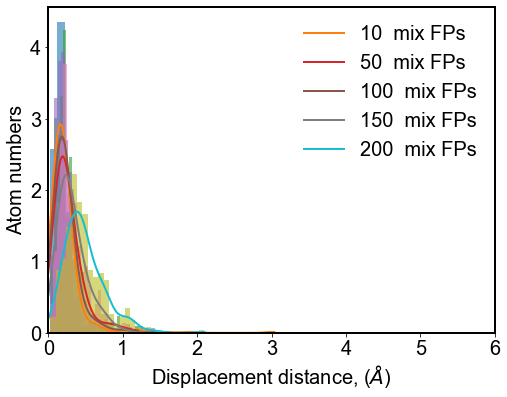

In [235]:
path='/home/heruhe/Desktop/Ga2o3/Frenkelpair/FP_beta/DFT/two_potential_contrast/tab/mix'
os.chdir(path)
for FPn in [10,50,100,150,200]:
    dis=displacement_A(FPn,' mix FPs')




-5.8146875 -5.77125


(array([-5.95, -5.9 , -5.85, -5.8 , -5.75, -5.7 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

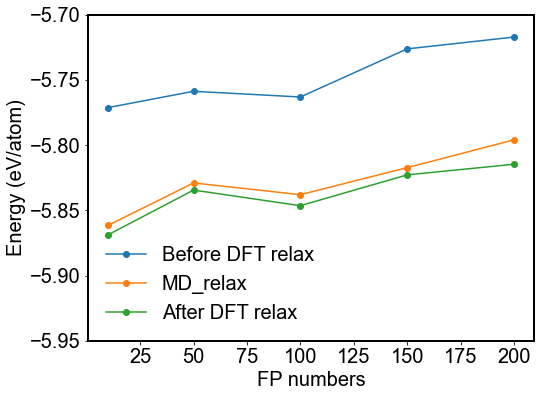

In [242]:
#tapGap
before_dft_mix_pe=np.array([-1846.8,-1842.8,-1844.2,-1832.4,-1829.5])/320
after_dft_mix_pe=np.array([-1878,-1867.03,-1870.86,-1863.3,-1860.7])/320
md_relax=np.array([-5.8615,-5.829,-5.838,-5.8173,-5.796])
print(max(after_dft_mix_pe),min(before_dft_mix_pe))
n=[10,50,100,150,200]
plt.plot(n, before_dft_mix_pe,'-o',label='Before DFT relax')
plt.plot(n, md_relax,'-o',label='MD_relax')
plt.plot(n, after_dft_mix_pe,'-o',label='After DFT relax')
plt.ylabel('Energy (eV/atom)',fontsize=20)
plt.xlabel('FP numbers',fontsize=20)
plt.legend(fontsize=20,frameon=False)
plt.rcParams["font.family"] = "arial"
plt.grid(False)
# Set the desired x-axis limits
#plt.xlim(0.1, 1.6)
#plt.yticks(np.linspace(-5.99, -5.79, num=5))
plt.ylim(-5.95, -5.7)# Replace x_min and x_max with your desired range
plt.rcParams["axes.linewidth"] = 2 
plt.rcParams["axes.edgecolor"] = 'black'
plt.rcParams["figure.figsize"] = (8,6) 
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 


-5.876250000000001 -5.8465625


Text(0.5, 0, '')

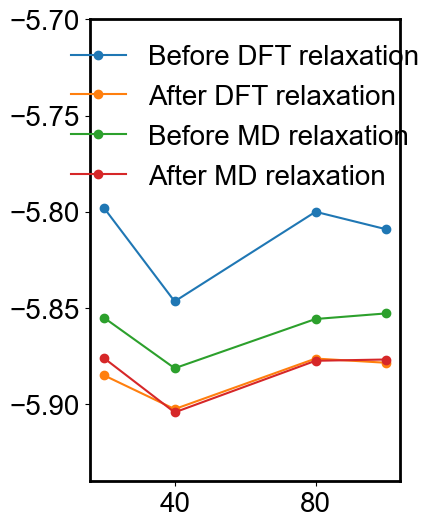

In [5]:
before_dft_Ga_pe=np.array([-1855.4,-1870.9,-1856.0,-1858.9])/320
after_dft_Ga_pe=np.array([-1883.2,-1888.8,-1880.4,-1881.1])/320
md_relax=np.array([-5.8761,-5.9042, -5.8774,-5.87674])
n=[20,40,80,100]
print(max(after_dft_Ga_pe),min(before_dft_Ga_pe))
plt.plot(n, before_dft_Ga_pe,'-o',label='Before DFT relaxation')
plt.plot(n, after_dft_Ga_pe,'-o',label='After DFT relaxation')
plt.plot(n, before_md_relax,'-o',label='Before MD relaxation')
plt.plot(n, md_relax,'-o',label='After MD relaxation')

plt.ylabel('Energy (eV/atom)',fontsize=20)
plt.xlabel('FP numbers',fontsize=20)
plt.legend(fontsize=20,frameon=False,loc='upper center')
plt.rcParams["font.family"] = "arial"
plt.grid(False)
# Set the desired x-axis limits
#plt.xlim(0.1, 1.6)
plt.xticks([40,80])

plt.ylim(-5.94, -5.7)# Replace x_min and x_max with your desired range
plt.rcParams["axes.linewidth"] = 2 
#plt.rcParams["axes.edgecolor"] = 'white'
plt.rcParams["figure.figsize"] = (4,6) 
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
#Remove the y-axis ticks
#plt.yticks([])
# Remove the y-axis label
plt.ylabel('')  # Set an empty string as the y-axis label
plt.xlabel('')  # Set an empty string as the x-axis label

-5.8278125 -5.77375


([], [])

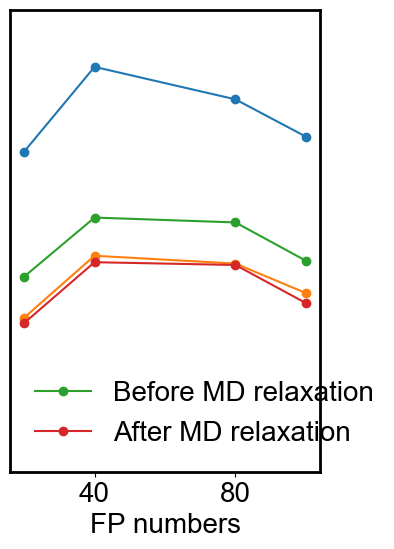

In [11]:
before_dft_mix_pe=np.array([-1847.6,-1833.5,-1838.9,-1845.1])/320
after_dft_mix_pe=np.array([-1875.2,-1864.9,-1866.2,-1871.1])/320
#before_md_relax=np.array([-5.8387,-5.80797,-5.8105,-5.8304])
md_relax=np.array([-5.8628,-5.831157,-5.8326,-5.8524])
print(max(after_dft_mix_pe),min(before_dft_mix_pe))
n=[20,40,80,100]
plt.plot(n, before_dft_mix_pe,'-o')
plt.plot(n, after_dft_mix_pe,'-o')
plt.plot(n, before_md_relax,'-o',label='Before MD relaxation')
plt.plot(n, md_relax,'-o',label='After MD relaxation')
plt.ylabel('Energy (eV/atom)',fontsize=20)
plt.xlabel('FP numbers',fontsize=20)
plt.legend(fontsize=20,frameon=False)
plt.rcParams["font.family"] = "arial"
plt.grid(False)
# Set the desired x-axis limits
#plt.xlim(0.1, 1.6)
#plt.yticks(np.linspace(-5.99, -5.79, num=5))
plt.xticks([40,80])
plt.ylim(-5.94, -5.7)# Replace x_min and x_max with your desired range
plt.rcParams["axes.linewidth"] = 2 
plt.rcParams["axes.edgecolor"] = 'black'
plt.rcParams["figure.figsize"] = (4,6) 
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.ylabel('')  
plt.yticks([])

-5.820528125 -5.8271875


Text(0.5, 0, '')

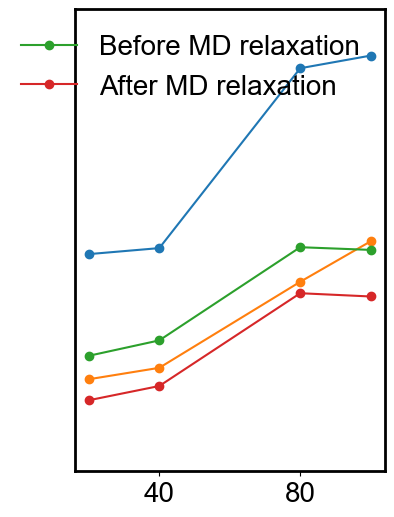

In [13]:
before_dft_o_pe=np.array([-1864.7,-1863.7,-1833.8,-1831.7])/320
after_dft_o_pe=np.array([-1885.5,-1883.6,-1869.3,-1862.569])/320
before_md_relax=np.array([-5.880,-5.872,-5.8236,-5.825])
md_relax=np.array([-5.9031,-5.8957,-5.8475,-5.8492])
print(max(after_dft_o_pe),min(before_dft_o_pe))
n=[20,40,80,100]
plt.plot(n, before_dft_o_pe,'-o')
plt.plot(n, after_dft_o_pe,'-o')
plt.plot(n, before_md_relax,'-o',label='Before MD relaxation')
plt.plot(n, md_relax,'-o',label='After MD relaxation')
plt.ylabel('Energy (eV/atom)',fontsize=20)
plt.xlabel('FP numbers',fontsize=20)
plt.legend(fontsize=20,frameon=False)
plt.rcParams["font.family"] = "arial"
plt.grid(False)
# Set the desired x-axis limits
#plt.xlim(0.1, 1.6)
#plt.yticks(np.linspace(-5.99, -5.79, num=5))
plt.xticks([40,80])
plt.ylim(-5.94, -5.7)# Replace x_min and x_max with your desired range
plt.rcParams["axes.linewidth"] = 2 
plt.rcParams["axes.edgecolor"] = 'black'
plt.rcParams["figure.figsize"] = (4,6) 
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.ylabel('')  
plt.yticks([])
plt.xlabel('')